In [ ]:
## 네이버 뉴스 크롤링

from selenium import webdriver
import time
import re
import csv

keywords = ['공유자전거', '공공자전거', '따릉이', '타랑께', '누비자', '반디클'] #반디클은 7페이지까지
driver = webdriver.Chrome('C:/Temp/chromedriver')

for keyword in keywords:

    newsname = []
    pageNum = 1
    
    url = 'https://search.naver.com/search.naver?&where=news&query=' +str(keyword)+ '&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=53&start=1&refresh_start=0'
    driver.get(url)
    time.sleep(2)

    while True:
        newsnode = driver.find_elements_by_css_selector('.news_tit')

        for i in newsnode:
            newsname.append(i.text)
        
        next = driver.find_element_by_css_selector('.btn_next')
        pageNum += 1
    
        if pageNum > 50 :
            break
        else :
            next.click()
            time.sleep(3)
    
    with open(str(keyword) + '.csv', 'w', newline='', encoding='UTF-8') as f:
        f.write('newsname\n')
        for i in range(len(newsname)):
            f.write(newsname[i]+'\n')

In [2]:
## 워드클라우드

from selenium import webdriver
import time
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

f = open('data/공공자전거.csv', 'r', encoding='UTF-8')
lines = f.readlines()

# title data 합치기
message = ''
for line in lines:
    message = message + re.sub('[^\w]', ' ', line) +''
message = re.sub('자전거', '', message)
message = re.sub('공공', '', message)

# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)

# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)

공유 : 81
따릉 : 73
고양시 : 52
서울 : 50
도입 : 50
무인 : 45
운영 : 39
보험 : 38
도로 : 34
서울시 : 34
광주 : 34
이용 : 33
대여 : 33
가입 : 31
조성 : 31
설치 : 30
타조 : 29
서비스 : 28
정책 : 24
활성화 : 23
여소 : 23
광주시 : 23
수리 : 21
코로나 : 20
국회 : 19
용인시 : 19
무료 : 19
방치 : 17
시설 : 17
둘레길 : 17
평택시 : 17
추진 : 16
이용자 : 16
무단 : 15
도시 : 15
사업 : 15
대상 : 15
지원 : 14
구민 : 13
수원시 : 13
서구 : 13
문화 : 13
선정 : 12
전기 : 12
노원구 : 12
문관 : 12
김광훈 : 12
위촉 : 12
계획 : 12
본격 : 12
시민 : 11
제주 : 11
공단 : 11
추가 : 11
센터 : 11
자원 : 10
시범 : 10
천안 : 10
확대 : 10
천안시 : 10
역사 : 10
수립 : 10
최대 : 9
모집 : 9
새싹따릉 : 9
자가발전 : 9
쿨링포그 : 9
정비 : 8
시대 : 8
대리점 : 8
개방 : 8
달린다 : 8
화성시 : 8
급식 : 8
학습 : 8
키트 : 8
거리 : 8
최우수 : 8
택시 : 8
연장 : 7
송파구 : 7
이유 : 7
한강 : 7
포토 : 7
이춘석 : 7
도심 : 7
평택 : 7
운행 : 7


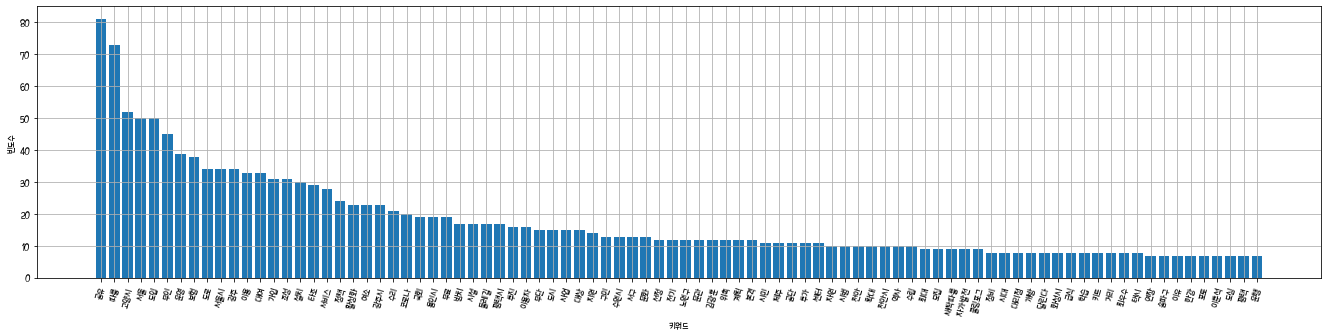

In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치 C:/phm/PYDATAexam/bucheon/THEdog.ttf
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

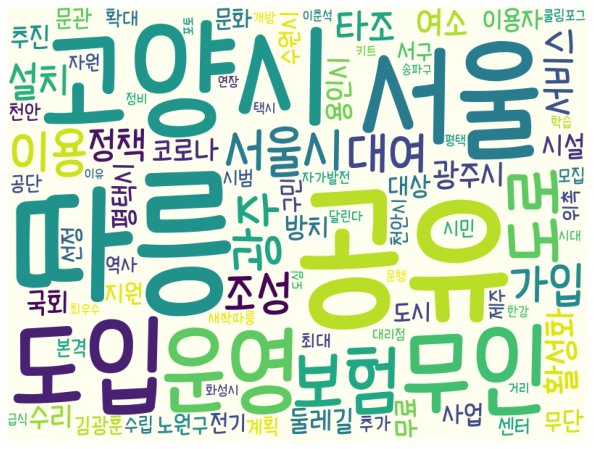

In [4]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
wc.to_file('output/wordcloud.png')